In [1]:
!wget https://drive.google.com/drive/folders/1T0Uf1UT7KhG7UQ5hGP4KmdOfhnIzSSLy

--2024-09-25 17:07:22--  https://drive.google.com/drive/folders/1T0Uf1UT7KhG7UQ5hGP4KmdOfhnIzSSLy
Resolving drive.google.com (drive.google.com)... 64.233.188.101, 64.233.188.113, 64.233.188.138, ...
Connecting to drive.google.com (drive.google.com)|64.233.188.101|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&osid=1&continue=https://drive.google.com/drive/folders/1T0Uf1UT7KhG7UQ5hGP4KmdOfhnIzSSLy&followup=https://drive.google.com/drive/folders/1T0Uf1UT7KhG7UQ5hGP4KmdOfhnIzSSLy [following]
--2024-09-25 17:07:22--  https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&osid=1&continue=https://drive.google.com/drive/folders/1T0Uf1UT7KhG7UQ5hGP4KmdOfhnIzSSLy&followup=https://drive.google.com/drive/folders/1T0Uf1UT7KhG7UQ5hGP4KmdOfhnIzSSLy
Resolving accounts.google.com (accounts.google.com)... 142.251.170.84, 2404:6800:4008:c19::54
Connecting to accounts.google.com (accounts.

In [2]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your zip file
zip_path = '/content/drive/MyDrive/Deep Learning/CNN/Fruits and vegetables Clasification.zip'
extract_path = '/content/Fruits and vegetables Clasification'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Mounted at /content/drive


## Step 1 : Import Libraries

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

## Step 2 : Set Image Parameters:

In [4]:
img_height, img_width = 40,40
batch_size = 20

## Step 3 : Load the Dataset:

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/Fruits and vegetables Clasification/Fruits and vegetables Clasification/train",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/Fruits and vegetables Clasification/Fruits and vegetables Clasification/validation",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/Fruits and vegetables Clasification/Fruits and vegetables Clasification/test",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


## Step 4 : Display Random Images with Labels

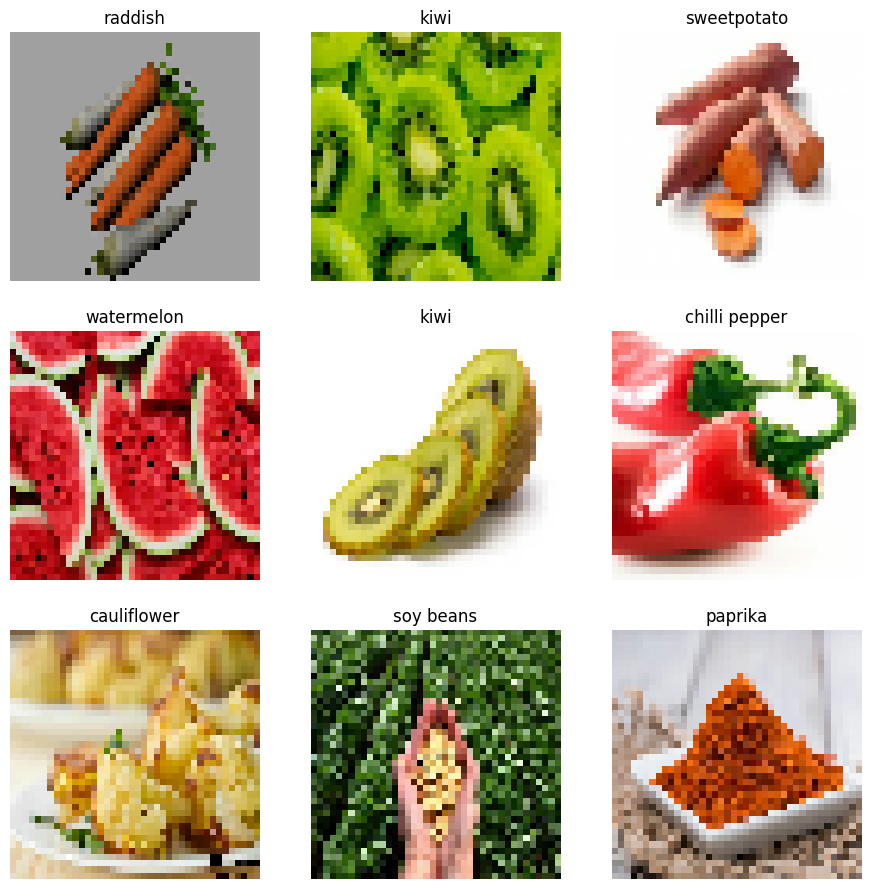

In [6]:
class_names = train_ds.class_names

plt.figure(figsize=(11,11))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

## Step 5 : Prepare the Dataset for Performance

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Step 6 : Build the CNN model

In [8]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # Output layer with softmax
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()  # To view the structure of your model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 40, 40, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 38, 38, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 19, 19, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 17, 17, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 6, 6, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245,476 (958.89 KB)

 Trainable params: 245,476 (958.89 KB)

 Non-trainable params: 0 (0.00 B)

## Step 7 : Train the Model:

In [10]:
epochs = 20  # You can set this as per your need

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 81s 119ms/step - accuracy: 0.0560 - loss: 3.4393 - val_accuracy: 0.2222 - val_loss: 2.5109
Epoch 2/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.1807 - loss: 2.6853 - val_accuracy: 0.3818 - val_loss: 2.0817
Epoch 3/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.2620 - loss: 2.3489 - val_accuracy: 0.4387 - val_loss: 1.7348
Epoch 4/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.3401 - loss: 2.1191 - val_accuracy: 0.5442 - val_loss: 1.5341
Epoch 5/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.3927 - loss: 1.9620 - val_accuracy: 0.5413 - val_loss: 1.5151
Epoch 6/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.4462 - loss: 1.8392 - val_accuracy: 0.5470 - val_loss: 1.4709
Epoch 7/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.4675 - loss: 1.7413 - val_accuracy: 0.6182 - val_loss: 1.2218
Epoch 8/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.5067 - loss: 1.5961 - val

## Step 8 : Evaluate on Test Data:

In [11]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.2f}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 470ms/step - accuracy: 0.8865 - loss: 0.4829
Test accuracy: 0.90


## Step 9 : Plot Training and Validation Results:

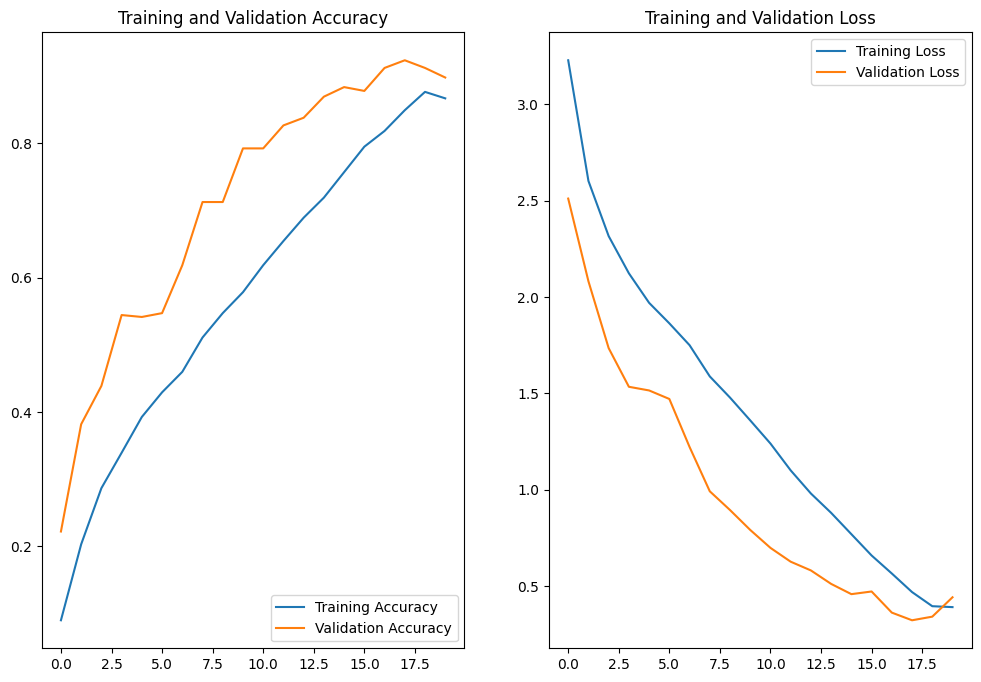

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Step 10 : Make Predictions on New Data:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


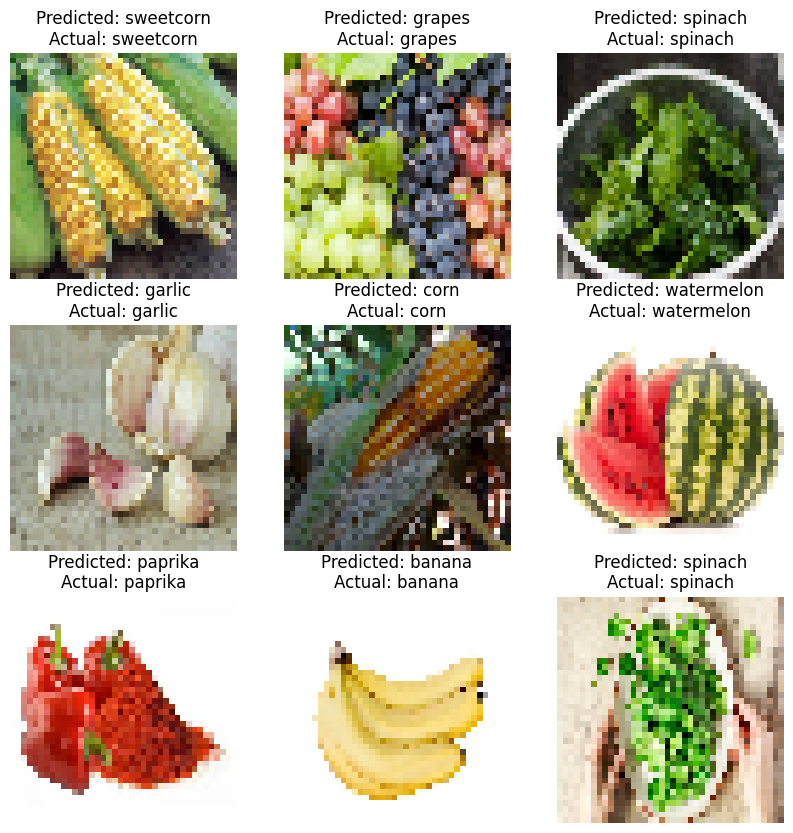

In [13]:
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted: {class_names[predicted_labels[i]]}\nActual: {class_names[labels[i]]}")
        plt.axis("off")
plt.show()

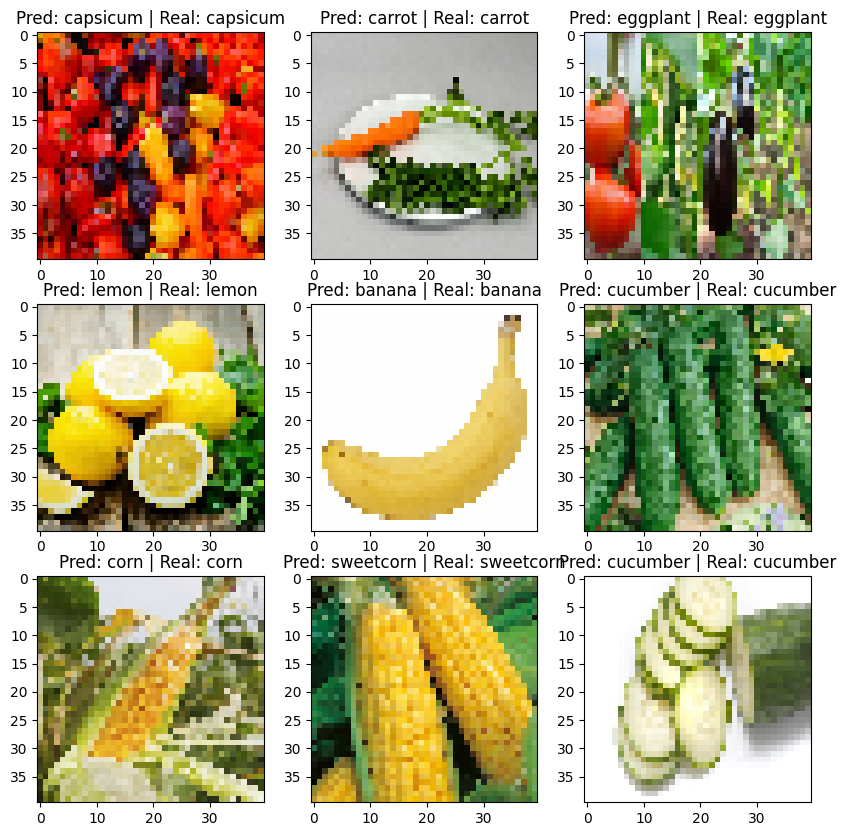

In [14]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])
    #plt.title("Real: " + class_names[labels[i]] + " | Pred: " + class_names[index])

In [17]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model_frveg", 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpsvj88qjf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 40, 40, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 36), dtype=tf.float32, name=None)
Captures:
  138890719951712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138890720250336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138890720251744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138890720253856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138890720248752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138890720255616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138890720254736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138890720257376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138890720251568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138890720258960: TensorSpec(shape=(), dtype=tf.resource, name=None)
